# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [4]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [10]:
df_raw.count()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.5 KB


Answer: 400

#### Question 2. Create a summary table

In [5]:
#function
df_raw.describe()

C:\Users\maggie.chan\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a more range than GPA and in turn has higher variance

#### Question 4. Drop data points with missing data


In [14]:
df_raw2 = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [17]:
df_raw2.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: Pulling the summary table allows us to see that the count have been reduced and there are no longer any NaN values in the percentiles, which means the NaNs have been removed.

#### Question 6. Create box plots for GRE and GPA

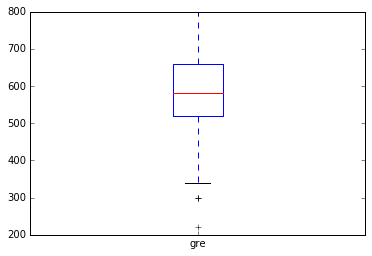

In [24]:
df_raw2['gre'].plot(kind='box')

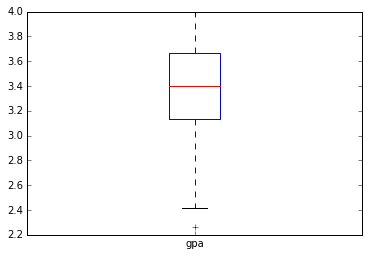

In [21]:
df_raw2['gpa'].plot(kind='box')#boxplot 2 

#### Question 7. What do this plots show?

Answer: It shows the distribution of the data. The bottom line represents the min (minus the outliers), top line shows the max, the bottom side of the box represents the 25 percentile, red line represents median and top of the box represents the 7 percentile. The plus sign/cross shows the outliers

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0D6BB5D0>]], dtype=object)

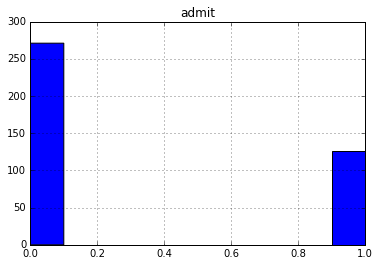

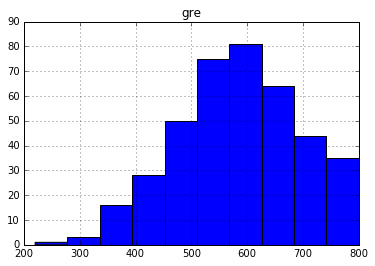

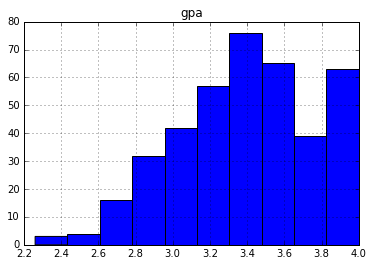

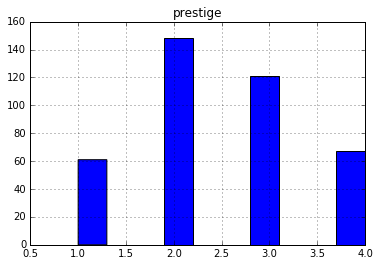

In [25]:
# plot the distribution of each variable 
df_raw2.hist('admit')
df_raw2.hist('gre')
df_raw2.hist('gpa')
df_raw2.hist('prestige')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No (for the continuous variables gre and gpa), these distributions are not symmetrical and the mean is not equal to the median.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes (for the continuous variables gre and gpa), these distributions need to be normalized for better comparison and analysis-- subtract the mean and divide by population standard deviation. This does not apply to the categorical variables

#### Question 11. Which of our variables are potentially colinear? 

In [26]:
# create a correlation matrix for the data
df_raw2.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Between variables, gre and gpa seem to have the biggest correlation at .38

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:  Graph prestige ranks with the number of student admittance in each rank and observe if there is a pattern to the relationship

#### Question 14. What is your hypothesis? 

Answer: There is an association between higher grad school admissions rates and higher prestige (lower number) of undergraduate schools

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [60]:
df_temp = df_raw[df_raw.gre.notnull() & df_raw.gpa.notnull()]
df_raw3.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data

In [65]:
df_raw4 = df_raw.fillna(df_raw.mean())